In [2]:
!pip install imbalanced-learn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
import pandas as pd
from sklearn.linear_model import LinearRegression, LogisticRegression
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, roc_auc_score, roc_curve, auc
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, StandardScaler
import numpy as np
from collections import Counter
from imblearn.over_sampling import SMOTE
from sklearn.svm import SVC
import tensorflow as tf
import math
from tensorflow import keras
from sklearn.ensemble import RandomForestClassifier

In [4]:
! pip install lightgbm

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [5]:
df = pd.read_csv('/content/drive/MyDrive/data/for_model.csv')
df.head()

,Unnamed: 0,Name,seq,0,1,2,3,4,5,6,...,82071,82072,82073,82074,82075,82076,82077,82078,82079,IsPhi
0,392,0x00789b1c3d583e3057c264888afc2c38e4aff5b7,392,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
1,77,0x026b201e62832e0d1aed4ea575258d28cd5a51e7,77,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
2,403,0x02725836ebf3ecdb1cdf1c7b02fcbbfaa2736af8,403,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
3,13,0x0371a82e4a9d0a4312f3ee2ac9c6958512891372,13,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
4,292,0x03946674ecc44b7a1f5a8520d422f7b0d7c5f5f5,292,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0


In [6]:
df.describe()

,Unnamed: 0,seq,0,1,2,3,4,5,6,7,...,82071,82072,82073,82074,82075,82076,82077,82078,82079,IsPhi
count,480.000000,480.000000,480.0,480.0,480.0,480.0,480.0,480.0,480.0,480.0,...,480.0,480.0,480.0,480.0,480.0,480.0,480.0,480.0,480.0,480.000000
mean,239.500000,239.500000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.056250
std,138.708327,138.708327,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.230644
min,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
25%,119.750000,119.750000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
50%,239.500000,239.500000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
75%,359.250000,359.250000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
max,479.000000,479.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.000000


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 480 entries, 0 to 479
Columns: 82084 entries, Unnamed: 0 to IsPhi
dtypes: float64(82080), int64(3), object(1)
memory usage: 300.6+ MB


In [8]:
df["Name"] = df["Name"].map(lambda x: int(x, 16))
df["Name"]

0         2689601437590462607429852257209775928820889015
1        13806959210456748185188401174321500165280256487
2        13967951064325089873631840456498472017747733240
3        19661607136109163505421211297003655503383434098
4        20436407842490681217438975471522143720891086325
                             ...                        
475    1456710951954084107063118492946004556263767233030
476    1457050797812007030387898497452595399983189849306
477    1458968668008503369879318902365806370991513189580
478    1460347299867838409901970762857478516145391712352
479    1460792098498094508410147264157631955691462320741
Name: Name, Length: 480, dtype: object

In [9]:
new_list = []
for col in df.columns:
  if col.isdigit():
    new_list.extend(df[col].unique())
print(new_list)
len(set(new_list))

[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,

193

In [10]:
y = df.IsPhi
X = df.drop(columns=["IsPhi"])
oversample = SMOTE()
X_o, y_o = oversample.fit_resample(X, y)

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.33, random_state=42)
X_train_o, X_test_o, y_train_o, y_test_o = train_test_split(X_o, y_o, stratify=y_o, test_size=0.33, random_state=42)

In [12]:
scaler = MinMaxScaler().fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [13]:
scaler = MinMaxScaler().fit(X_train_o)
X_train_o = scaler.transform(X_train_o)
X_test_o = scaler.transform(X_test_o)

In [14]:
Counter(y_train_o)

Counter({0: 303, 1: 304})

## Balanced Classes (89% avg recall)

### LR 
- l1: 83%
- l2: 82%

              precision    recall  f1-score   support

           0       0.98      0.87      0.93       150
           1       0.27      0.78      0.40         9

    accuracy                           0.87       159
   macro avg       0.63      0.83      0.66       159
weighted avg       0.94      0.87      0.90       159



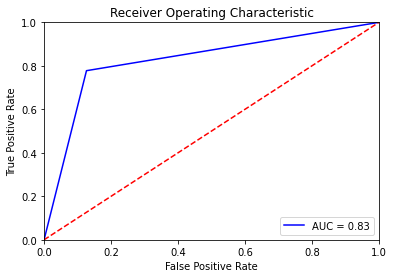

In [ ]:
lr = LogisticRegression(solver="liblinear", class_weight="balanced", max_iter=10000, penalty="l1")
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)
print(classification_report(y_test, y_pred))
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

### SVM 
- 83% recall for C = .8, .9, .95, 1
- 84% recall for C = 1.5
- 85% recall for C = 1.75, 2.0, 3.0
- 86% recall for C = 5.0, 200.0
- 87% recall for C = 150.0
- 88% recall for C = 50.0, 75.0, 80.0, 100.0

              precision    recall  f1-score   support

           0       0.99      0.94      0.96       150
           1       0.44      0.78      0.56         9

    accuracy                           0.93       159
   macro avg       0.71      0.86      0.76       159
weighted avg       0.95      0.93      0.94       159



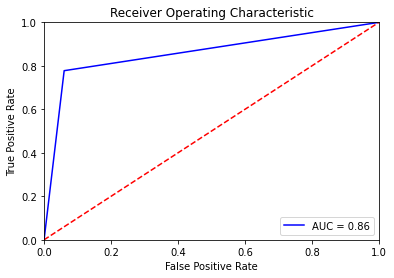

In [ ]:
lr = SVC(class_weight="balanced", C=200.0)
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)
print(classification_report(y_test, y_pred))
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

### RF
max_depth 
- 2: 89%
- 5: 89%
- 10: 89%
- 100: 89%
- None: 89%

              precision    recall  f1-score   support

           0       0.99      1.00      0.99       150
           1       1.00      0.78      0.88         9

    accuracy                           0.99       159
   macro avg       0.99      0.89      0.93       159
weighted avg       0.99      0.99      0.99       159



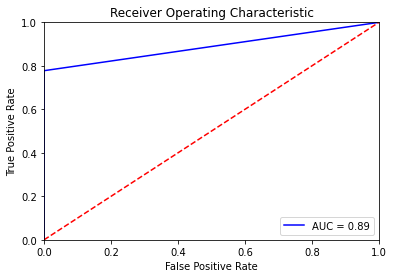

In [ ]:
clf = RandomForestClassifier(n_estimators=100, random_state=42, class_weight="balanced")
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
print(classification_report(y_test, y_pred))
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

### MLP
Recall: 83%  
L1: 82%  
L2: 83%

In [28]:
neg, pos = np.bincount(df['IsPhi'])
total = neg + pos
print('Examples:\n    Total: {}\n    Positive: {} ({:.2f}% of total)\n'.format(
    total, pos, 100 * pos / total))

Examples:
    Total: 480
    Positive: 27 (5.62% of total)



In [29]:
METRICS = [
      keras.metrics.TruePositives(name='tp'),
      keras.metrics.FalsePositives(name='fp'),
      keras.metrics.TrueNegatives(name='tn'),
      keras.metrics.FalseNegatives(name='fn'), 
      keras.metrics.BinaryAccuracy(name='accuracy'),
      keras.metrics.Precision(name='precision'),
      keras.metrics.Recall(name='recall'),
      keras.metrics.AUC(name='auc'),
      keras.metrics.AUC(name='prc', curve='PR'), # precision-recall curve
]

In [32]:
initial_bias = np.log([pos/neg])
model = keras.Sequential()
model.add(keras.layers.Dense(16, input_dim=X_train.shape[1], activation='relu', kernel_initializer='he_uniform'))
model.add(keras.layers.Dense(1, activation='sigmoid', bias_initializer=tf.keras.initializers.Constant(initial_bias)))
model.compile(loss='binary_crossentropy', optimizer='sgd', metrics=METRICS)
history = model.fit(X_train, y_train, epochs=100, verbose=1)
y_pred = model.predict(X_test)

Epoch 1/100
11/11 [==============================] - 4s 39ms/step - loss: 0.2160 - tp: 0.0000e+00 - fp: 0.0000e+00 - tn: 303.0000 - fn: 18.0000 - accuracy: 0.9439 - precision: 0.0000e+00 - recall: 0.0000e+00 - auc: 0.5099 - prc: 0.0571
Epoch 2/100
11/11 [==============================] - 0s 41ms/step - loss: 0.2159 - tp: 0.0000e+00 - fp: 0.0000e+00 - tn: 303.0000 - fn: 18.0000 - accuracy: 0.9439 - precision: 0.0000e+00 - recall: 0.0000e+00 - auc: 0.5264 - prc: 0.0590
Epoch 3/100
11/11 [==============================] - 0s 37ms/step - loss: 0.2157 - tp: 0.0000e+00 - fp: 0.0000e+00 - tn: 303.0000 - fn: 18.0000 - accuracy: 0.9439 - precision: 0.0000e+00 - recall: 0.0000e+00 - auc: 0.5545 - prc: 0.0625
Epoch 4/100
11/11 [==============================] - 0s 43ms/step - loss: 0.2156 - tp: 0.0000e+00 - fp: 0.0000e+00 - tn: 303.0000 - fn: 18.0000 - accuracy: 0.9439 - precision: 0.0000e+00 - recall: 0.0000e+00 - auc: 0.6485 - prc: 0.0779
Epoch 5/100
11/11 [==============================] - 0s 

In [33]:
y_pred

array([[0.0499821 ],
       [0.04119182],
       [0.05555913],
       [0.03395998],
       [0.04880199],
       [0.04924905],
       [0.05303082],
       [0.03392124],
       [0.04892573],
       [0.03484556],
       [0.03535309],
       [0.03541118],
       [0.05620667],
       [0.04191476],
       [0.04269886],
       [0.04246965],
       [0.04363135],
       [0.04222301],
       [0.04034105],
       [0.06336761],
       [0.04912227],
       [0.03959787],
       [0.04367229],
       [0.03649104],
       [0.04692501],
       [0.04082754],
       [0.03686833],
       [0.03644165],
       [0.05959061],
       [0.06577975],
       [0.05303559],
       [0.04985261],
       [0.03814906],
       [0.03554419],
       [0.04603246],
       [0.0474183 ],
       [0.05023414],
       [0.0607484 ],
       [0.06572068],
       [0.05421519],
       [0.03902066],
       [0.06263638],
       [0.03466311],
       [0.05775458],
       [0.03587896],
       [0.04646781],
       [0.04585525],
       [0.049

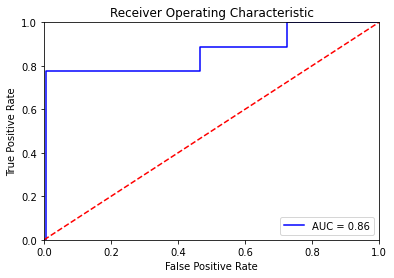

Best Threshold=0.064577, G-Mean=0.879


In [34]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()
gmeans = np.sqrt(tpr * (1-fpr))
ix = np.argmax(gmeans)
print('Best Threshold=%f, G-Mean=%.3f' % (thresholds[ix], gmeans[ix]))

In [35]:
best_th = thresholds[ix]
super_threshold_indices = y_pred > best_th
sub_threshold_indices = y_pred <= best_th

y_pred[super_threshold_indices] = 1
y_pred[sub_threshold_indices] = 0


print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.98      0.99      0.99       150
           1       0.86      0.67      0.75         9

    accuracy                           0.97       159
   macro avg       0.92      0.83      0.87       159
weighted avg       0.97      0.97      0.97       159



## SMOTE (93% avg recall)

              precision    recall  f1-score   support

           0       0.96      0.89      0.92       150
           1       0.89      0.97      0.93       149

    accuracy                           0.93       299
   macro avg       0.93      0.93      0.93       299
weighted avg       0.93      0.93      0.93       299



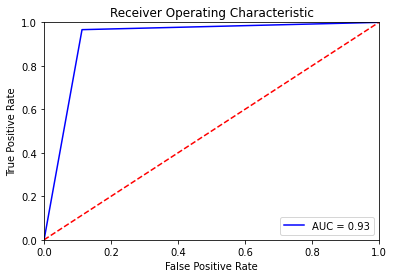

In [ ]:
lr = LogisticRegression(solver="liblinear", class_weight="balanced", max_iter=10000)
lr.fit(X_train_o, y_train_o)
y_pred = lr.predict(X_test_o)
print(classification_report(y_test_o, y_pred))
fpr, tpr, thresholds = roc_curve(y_test_o, y_pred)
roc_auc = auc(fpr, tpr)
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

              precision    recall  f1-score   support

           0       0.88      1.00      0.94       150
           1       1.00      0.87      0.93       149

    accuracy                           0.93       299
   macro avg       0.94      0.93      0.93       299
weighted avg       0.94      0.93      0.93       299



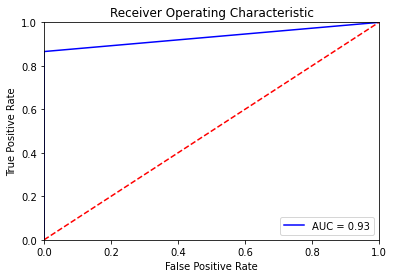

In [ ]:
clf = RandomForestClassifier(max_depth=2,n_estimators=150, random_state=42, class_weight="balanced")
clf.fit(X_train_o, y_train_o)
y_pred = clf.predict(X_test_o)
print(classification_report(y_test_o, y_pred))
fpr, tpr, thresholds = roc_curve(y_test_o, y_pred)
roc_auc = auc(fpr, tpr)
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [ ]:
METRICS = [
      keras.metrics.TruePositives(name='tp'),
      keras.metrics.FalsePositives(name='fp'),
      keras.metrics.TrueNegatives(name='tn'),
      keras.metrics.FalseNegatives(name='fn'), 
      keras.metrics.BinaryAccuracy(name='accuracy'),
      keras.metrics.Precision(name='precision'),
      keras.metrics.Recall(name='recall'),
      keras.metrics.AUC(name='auc'),
      keras.metrics.AUC(name='prc', curve='PR'), # precision-recall curve
]

In [ ]:
initial_bias = np.log([pos/neg])
model = keras.Sequential()
model.add(keras.layers.Dense(16, input_dim=X_train_o.shape[1], activation='relu', kernel_initializer='he_uniform'))
model.add(keras.layers.Dense(1, activation='sigmoid', bias_initializer=tf.keras.initializers.Constant(initial_bias)))
model.compile(loss='binary_crossentropy', optimizer='sgd', metrics=METRICS)
history = model.fit(X_train_o, y_train_o, epochs=100, verbose=0)
y_pred = model.predict(X_test_o)

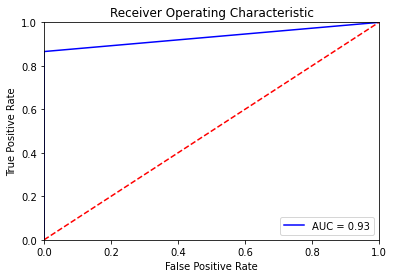

Best Threshold=1.000000, G-Mean=0.930


In [ ]:
fpr, tpr, thresholds = roc_curve(y_test_o, y_pred)
roc_auc = auc(fpr, tpr)
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()
gmeans = np.sqrt(tpr * (1-fpr))
ix = np.argmax(gmeans)
print('Best Threshold=%f, G-Mean=%.3f' % (thresholds[ix], gmeans[ix]))

In [ ]:
best_th = thresholds[ix]
super_threshold_indices = y_pred >= best_th
sub_threshold_indices = y_pred < best_th

y_pred[super_threshold_indices] = 1
y_pred[sub_threshold_indices] = 0


print(classification_report(y_test_o, y_pred))


              precision    recall  f1-score   support

           0       0.88      1.00      0.94       150
           1       1.00      0.87      0.93       149

    accuracy                           0.93       299
   macro avg       0.94      0.93      0.93       299
weighted avg       0.94      0.93      0.93       299

